Analysis of the data is done in the following notebook. Firstly, I will import all the necessary packages and the two datasets. Then after some preprocessing, we will walk through the important insights of the data.

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
random.seed(42) #seeting the seed so that random numbers will be reproducible
os.chdir('C:/Users/mithu/OneDrive/lark_project')


In [224]:
data_user_mission=pd.read_csv('user_mission.csv',header=0)
data_agg=pd.read_csv('agg_info.csv',header=0)

Let's first analyze the user_mission.csv file. This file records the number of missions completed by any users. I am assuming that the columns in the dataset have the following properties:
<ul>
<li>START_TIMESTAMP= Start of the mission time</li>
<li>END_TIMESTAMP= end of the mission time</li>
<li>COMPLETED= whether a user complete the mission in a giver time frame</li>
<li>USER_ID=user id</li>
</ul>
Firstly, I want to check how many attempts are completed (Marked as True in 'COMPLETED' column) and how many are not. So for ease of analysis, I am creating two datasets of the following:

In [225]:
data_user_sc=data_user_mission[data_user_mission['COMPLETED']==True]
data_user_usc=data_user_mission[data_user_mission['COMPLETED']==False]

From the below plot, We can see that around 85% of missions are completed out of the total attempted mission. That's not bedded in terms of success.

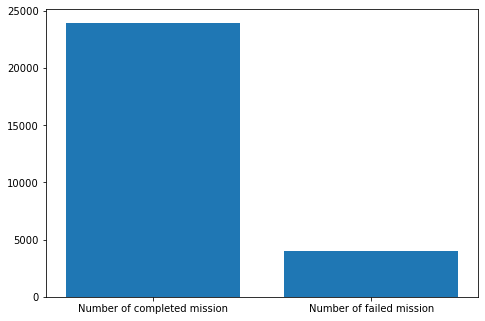

Percentage of completed mission 85.73776935996855%


In [226]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Counts = ['Number of completed mission','Number of failed mission']
Users_number = [data_user_sc.shape[0],data_user_usc.shape[0]]
ax.bar(Counts,Users_number)
plt.show()
print('Percentage of completed mission {}%'.format(data_user_sc.shape[0]/(data_user_usc.shape[0]+data_user_sc.shape[0])*100))

Let's see now, how many unique users are there that attempted the mission, which is 6671

In [227]:
#data_sc_info=data_agg
data_agg['USER_ID'].nunique()

6671

One of the important things to know is the number of people who tried once and did not complete the mission at any time after their first attempt. These data may be incomplete given the fact then there are some future data missing. Nevertheless, that number is  1186. Also, we can print this user_id to analyze the reason behind the failure of their mission.

In [228]:
rows=[]
n=data_user_mission.shape[0]
for i in range(len(unique_user)):
    count1=data_user_mission.loc[(data_user_mission['USER_ID']==unique_user[i])].shape[0]
    count2=data_user_mission.loc[(data_user_mission['USER_ID']==unique_user[i]) & (data_user_mission['COMPLETED']==False)].shape[0]
    if count1==count2:
        rows.append(i)
print(len(rows))

1186


Among the total unsuccessful mission, around 30% are the user that attempted for a first time and did not complete yet.

In [229]:
len(rows)/data_user_usc.shape[0]

0.29716862941618644

In [230]:
# Here are there users:
unique_user[rows]

array([1445159, 1449004, 1472928, ..., 1421056, 1411587, 1458694],
      dtype=int64)

Now, from the plot below, we can see that most users finish only one mission. The histogram represents the distribution of the number of missions completed by users. As the number of missions increases, the chance of completing the mission decreases, as expected. 

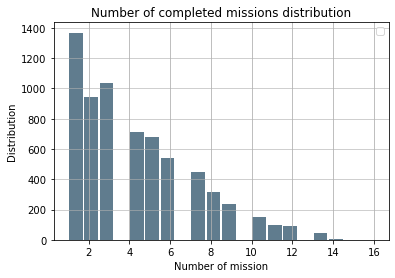

In [231]:
num_of_missions=pd.DataFrame(data_user_mission.groupby("USER_ID")["COMPLETED"].count().values)
num_of_missions.plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
plt.title('Number of completed missions distribution')
plt.xlabel('Number of mission')
plt.ylabel('Distribution')
plt.legend('')
plt.grid(axis='y', alpha=0.75)

Let's analyze, how much time on average it took to finish a mission for any users.


In [232]:
data_user_mission_noneNA= data_user_mission[data_user_mission['END_TIMESTAMP'].notna()]
data_user_mission_noneNA.reset_index(drop=True, inplace=True)


In [233]:
from datetime import datetime
import time
fmt = '%Y-%m-%d %H:%M:%S+00:00'
times=[]
for i in range(data_user_mission_noneNA.shape[0]):
    d1 = datetime.strptime(data_user_mission_noneNA['START_TIMESTAMP'][i], fmt)
    d2 = datetime.strptime(data_user_mission_noneNA['END_TIMESTAMP'][i], fmt)
    # Convert to Unix timestamp
    d1_ts = time.mktime(d1.timetuple())
    d2_ts = time.mktime(d2.timetuple())
    # They are now in seconds, subtract and then divide by 3600*24 to get minutes.
    times.append(int(d2_ts-d1_ts) / 86400)
#times

The plot has some larger time values that take to complete a mission. As the distribution is right-skewed, we can chop the outliers to see a better version.

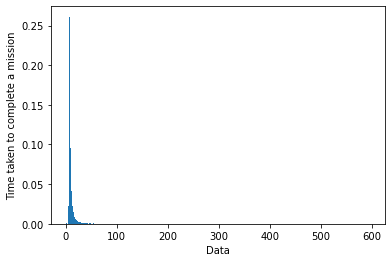

In [234]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.random.seed(42)
plt.hist(times, density=True, bins=300)  # `density=False` would make counts
plt.ylabel('Time taken to complete a mission')
plt.xlabel('Data');

So, it seems around 7 days on average are required for a user to finish a complete mission. 

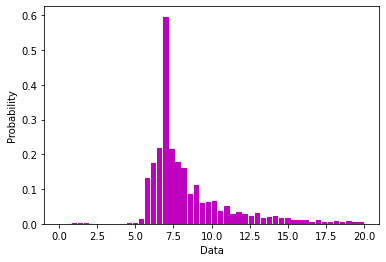

In [235]:
x1=[i for i in times if i<=20]
plt.hist(x1, density=True, bins=50,color='m', rwidth=0.9)  # `density=False` would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

Now lets analys data_agg csv file. This file contains different user specific data and the frequency of their communication with the apps. The data is user specific and there may be time variations. I am assuming that the features  in this dataset are representing the following terms:
<ul>
<li>USER_ID= the user specific ID</li>
<li>PST_DATE= pacific standard time when they interact with the app</li>
<li>NUM_CONVOS= number of conversations a user had during a specific time</li>
<li>NUM_ALL_MEALS= number of all meals a user had in a specific time</li>
<li>TOTAL_ACTIVITY_MINUTES2= total exercise acivity a user did in a specific time</li>
<li>NUM_ACTIVITY_MEASUREMENTS= number of exercise activities a user did in a specific time</li>
<li>NUM_WEIGHTS= number of weights measurement a user took in a specific time</li>
<li>NUM_NOTIFS= number of notifications a user had during a specific time</li>
</ul>
Let's go deeper with this dataset.

In [236]:
data_agg

,USER_ID,PST_DATE,NUM_CONVOS,NUM_ALL_MEALS,TOTAL_ACTIVITY_MINUTES2,NUM_ACTIVITY_MEASUREMENTS,NUM_WEIGHTS,NUM_NOTIFS
0,423344,2018-11-03,0.0,0,61.600000,40,0.0,0.0
1,427412,2018-10-24,0.0,0,21.900000,25,0.0,0.0
2,427412,2018-10-25,0.0,0,39.250000,26,0.0,0.0
3,652251,2018-12-14,0.0,0,124.333336,56,0.0,3.0
4,658572,2018-11-18,0.0,0,222.516660,49,0.0,0.0
...,...,...,...,...,...,...,...,...
468035,1212312,2018-12-30,0.0,0,26.733334,8,0.0,4.0
468036,1212312,2018-12-31,0.0,0,26.683332,4,0.0,4.0
468037,1213718,2018-11-27,4.0,3,57.633335,24,0.0,3.0
468038,1238045,2018-10-21,0.0,0,62.683334,16,0.0,0.0


If we see the correlation matrix, Number of notifications are negativly correlated with all the features whereas rest of features are positively correlated with each other.


In [237]:
data_agg.corr()

,USER_ID,NUM_CONVOS,NUM_ALL_MEALS,TOTAL_ACTIVITY_MINUTES2,NUM_ACTIVITY_MEASUREMENTS,NUM_WEIGHTS,NUM_NOTIFS
USER_ID,1.000000,0.037879,0.028939,0.011768,0.007220,0.003016,-0.024734
NUM_CONVOS,0.037879,1.000000,0.661338,0.143738,0.061440,0.175443,-0.102551
NUM_ALL_MEALS,0.028939,0.661338,1.000000,0.171318,0.095799,0.115314,-0.068762
TOTAL_ACTIVITY_MINUTES2,0.011768,0.143738,0.171318,1.000000,0.487869,0.063522,-0.038063
NUM_ACTIVITY_MEASUREMENTS,0.007220,0.061440,0.095799,0.487869,1.000000,0.082693,-0.082000
NUM_WEIGHTS,0.003016,0.175443,0.115314,0.063522,0.082693,1.000000,0.014433
NUM_NOTIFS,-0.024734,-0.102551,-0.068762,-0.038063,-0.082000,0.014433,1.000000


From the pair plot, we can see that number of conversations decreases with the increases in total activity, number of activity, number of weights, and number of notifications. We can also see other kinds of features pair relationship from here. But, this is for all users in general, and there are time and user variations. So, we want to see this relationship by building user and time-specific model later in this notebook. 

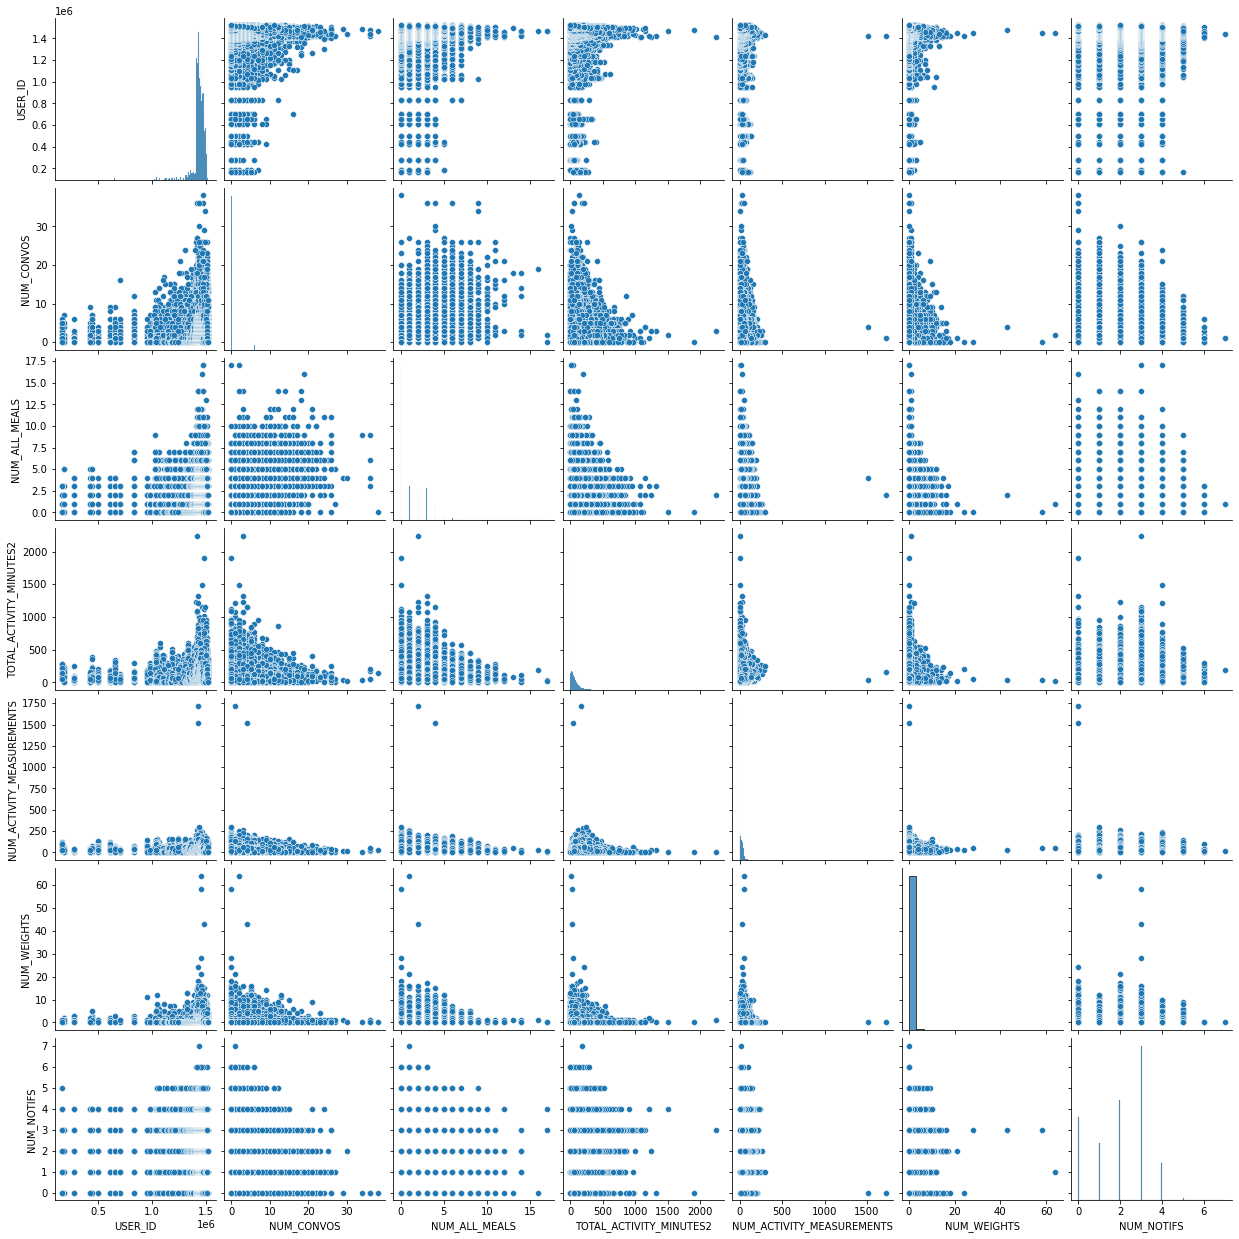

In [238]:
sns.pairplot(data_agg)
plt.show()

Firstly, I want to see if there is any time-related trend. Since the data is for the last three months of the 2019 year and for the January month of the year 2019, we don't have much to learn year to year variation. Let's analyze the data for monthly and perhaps days of the week variations. For this, we need to convert the PST_DATE to the proper date format such that the panda library can work with the time.

In [239]:
data_agg.PST_DATE=pd.to_datetime(data_agg.PST_DATE)
data_agg.dtypes

USER_ID                               int64
PST_DATE                     datetime64[ns]
NUM_CONVOS                          float64
NUM_ALL_MEALS                         int64
TOTAL_ACTIVITY_MINUTES2             float64
NUM_ACTIVITY_MEASUREMENTS             int64
NUM_WEIGHTS                         float64
NUM_NOTIFS                          float64
dtype: object

Now that the columns of the data are in the proper format, let’s set it as the DataFrame’s index to look for the time variation across all users.

In [240]:
df1 = data_agg.set_index('PST_DATE')
df1

,USER_ID,NUM_CONVOS,NUM_ALL_MEALS,TOTAL_ACTIVITY_MINUTES2,NUM_ACTIVITY_MEASUREMENTS,NUM_WEIGHTS,NUM_NOTIFS
PST_DATE,,,,,,,
2018-11-03,423344,0.0,0,61.600000,40,0.0,0.0
2018-10-24,427412,0.0,0,21.900000,25,0.0,0.0
2018-10-25,427412,0.0,0,39.250000,26,0.0,0.0
2018-12-14,652251,0.0,0,124.333336,56,0.0,3.0
2018-11-18,658572,0.0,0,222.516660,49,0.0,0.0
...,...,...,...,...,...,...,...
2018-12-30,1212312,0.0,0,26.733334,8,0.0,4.0
2018-12-31,1212312,0.0,0,26.683332,4,0.0,4.0
2018-11-27,1213718,4.0,3,57.633335,24,0.0,3.0


For better analysis, I created three new columns that will represent the year, month, and weekday features in the new dataset.

In [241]:
# Add columns with year, month, and weekday name
df1['Year'] = df1.index.year
df1['Month'] = df1.index.month
df1['Weekday Name'] = df1.index.day_name()
# Display a random sampling of 5 rows
df1.sample(5, random_state=0)

,USER_ID,NUM_CONVOS,NUM_ALL_MEALS,TOTAL_ACTIVITY_MINUTES2,NUM_ACTIVITY_MEASUREMENTS,NUM_WEIGHTS,NUM_NOTIFS,Year,Month,Weekday Name
PST_DATE,,,,,,,,,,
2018-11-26,1448944,3.0,3,121.709260,36,0.0,2.0,2018,11,Monday
2018-11-13,1422281,0.0,0,143.850000,47,0.0,0.0,2018,11,Tuesday
2018-12-28,1407150,3.0,3,13.916667,3,0.0,0.0,2018,12,Friday
2018-10-10,1411225,3.0,2,25.250000,31,0.0,1.0,2018,10,Wednesday
2018-12-20,1414432,1.0,1,538.500000,36,0.0,3.0,2018,12,Thursday


We will make a 2D histogram or a density heatmap using matplotlib hist2d() function with Month on X-axis and Number of Conversation on Y-axis. From the below plot, we can see that the conversation of the user with the apps has four months of data and most of the conversations were done in the months of October, November, and December.

(array([[3.67360e+04, 1.51900e+03, 1.06000e+02, 7.00000e+00, 1.00000e+00,
         2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+0

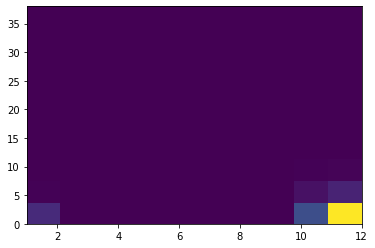

In [242]:
x=df1['Month']
y=df1['NUM_CONVOS']
plt.hist2d(x, y)

The below hexbin plot looks better than the heatmap and the trend is quite evident from this hexbin too. You can see the relation of the number of conversation with every month with January have the least conversation number as most of its values lies around 0. 

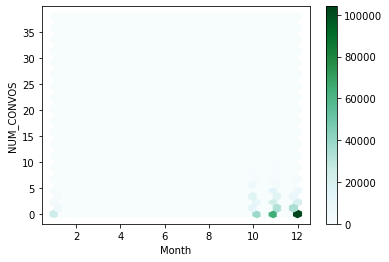

In [243]:
ax = df1.plot.hexbin(x='Month', y='NUM_CONVOS', gridsize=30,sharex=False)


<AxesSubplot:title={'center':'NUM_CONVOS'}, xlabel='Month'>

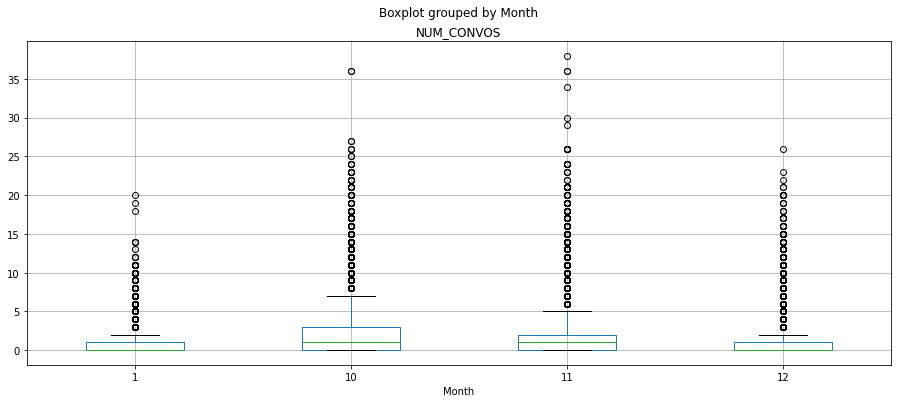

In [244]:
df1.boxplot(figsize=(15,6),by='Month',column='NUM_CONVOS')


We can again confirm the above claim by the boxplot below. The median of the number of conversation for the October and November months are higher compared to the other two months. The fluctuation of the other features across different months are visible from these boxplots. For example, the number of notification median is lower for the month of October compared to other months. 

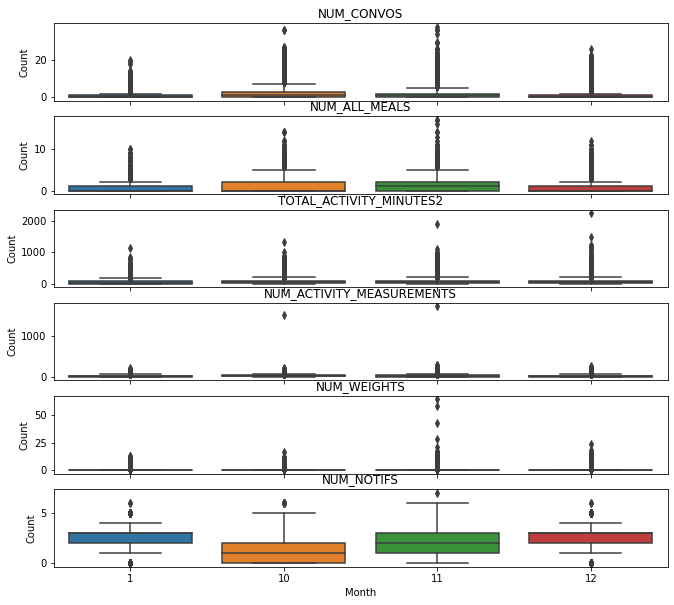

In [245]:
fig, axes = plt.subplots(6, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['NUM_CONVOS', 'NUM_ALL_MEALS','TOTAL_ACTIVITY_MINUTES2','NUM_ACTIVITY_MEASUREMENTS','NUM_WEIGHTS', 'NUM_NOTIFS'], axes):
    sns.boxplot(data=df1, x='Month', y=name, ax=ax)
    ax.set_ylabel('Count')
    ax.set_title(name)
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

Now let's analyze some weekday-specific variations across all users. We can see from the plot below that from Monday to Thursday, users interact more with the app compared to from Friday to Sunday. It is understandable as most users will be active during the weekdays and be relaxed closer to the time when the weekend comes and on the weekends. Of Course, some outliers users remain active throughout the week.

<AxesSubplot:title={'center':'NUM_CONVOS'}, xlabel='Weekday Name'>

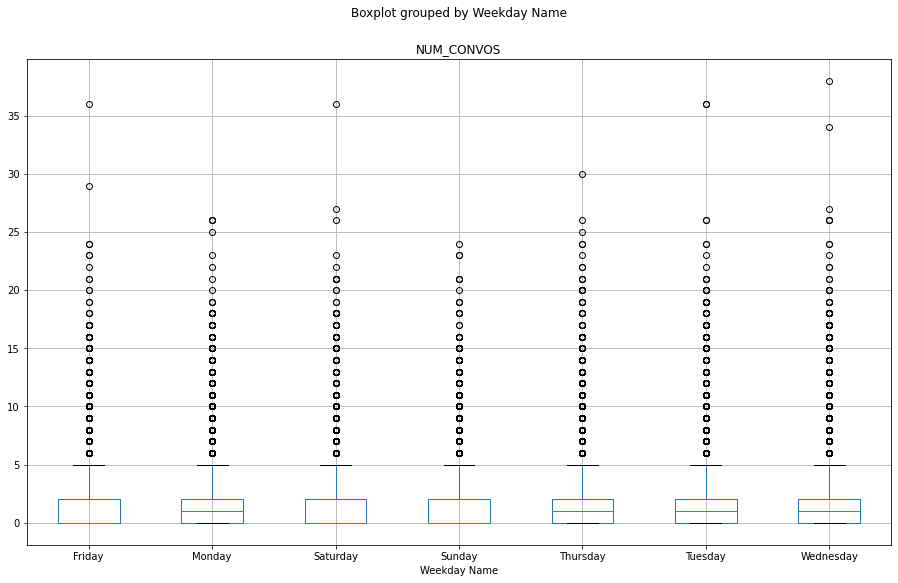

In [246]:
df1.boxplot(figsize=(15,9),by='Weekday Name',column='NUM_CONVOS')


In terms of notifications, users usually get similar notifications throughout the day of the week. On Saturday and Sunday, the lower 25% of users are not getting any notification, and the upper 25% of users may get fewer notifications, respectively, which can be seen from the boxplot. In terms of total activity, the users are showing a little more activity From Friday through Sunday compared to other days. The other features of the data are more or less similar throughout the days of a week.

<AxesSubplot:title={'center':'NUM_WEIGHTS'}, xlabel='Weekday Name'>

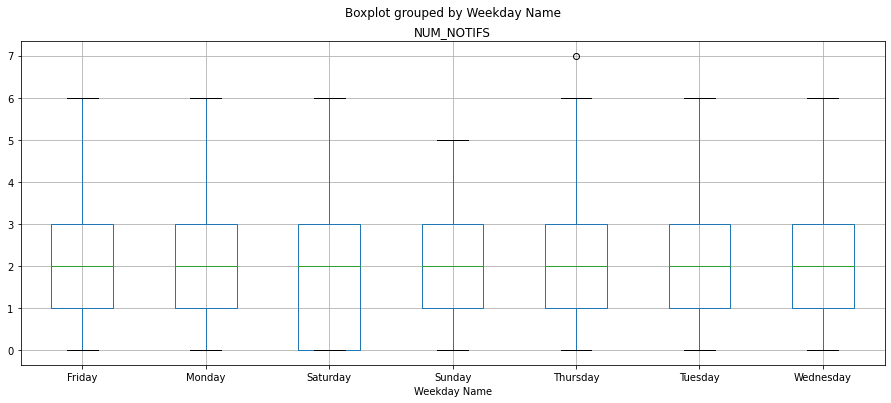

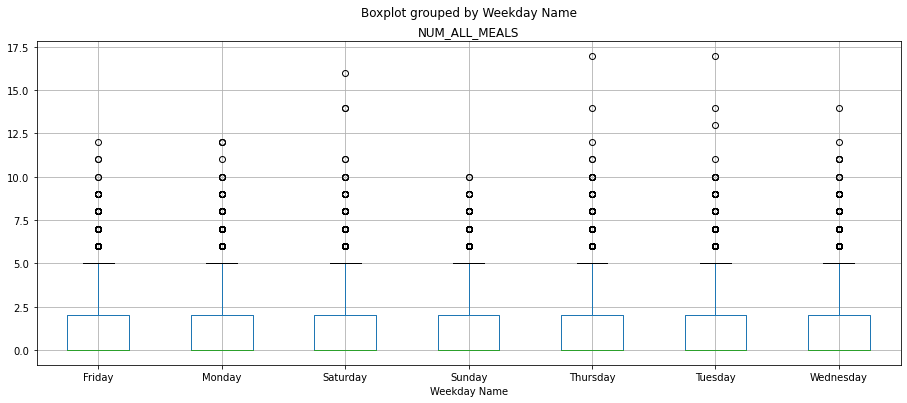

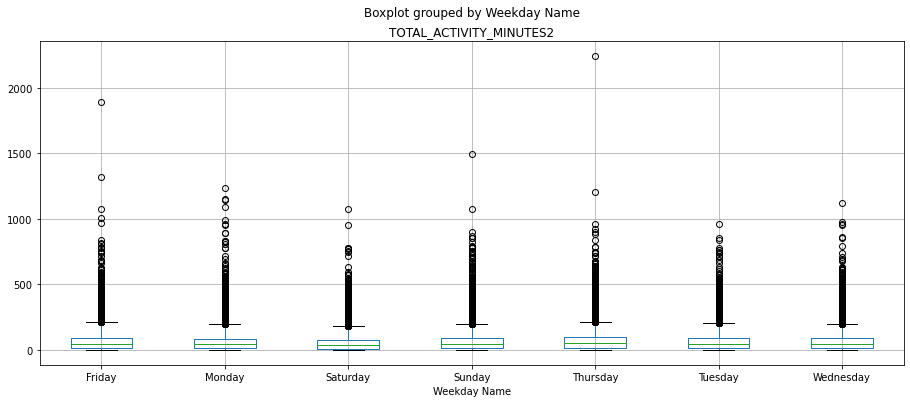

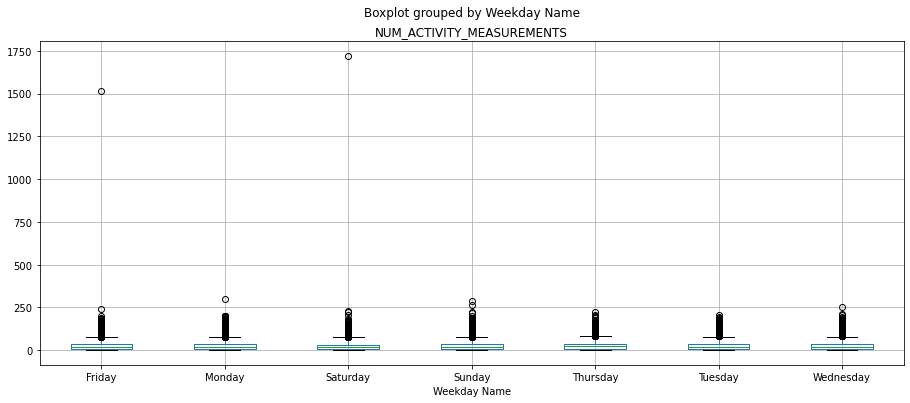

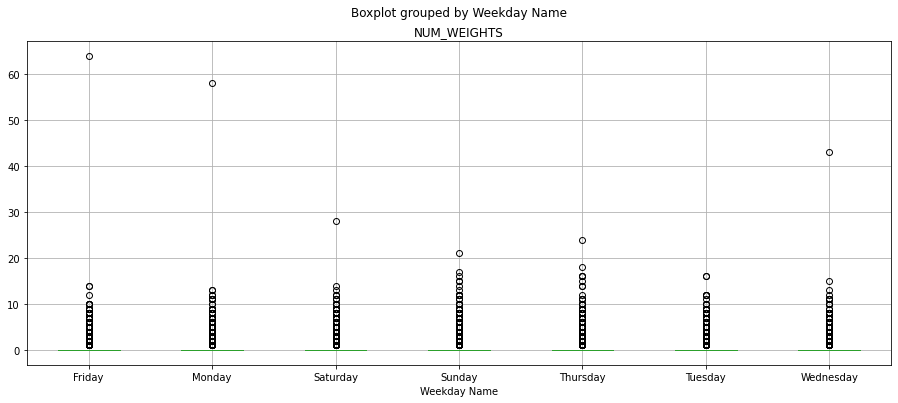

In [247]:
df1.boxplot(figsize=(15,6),by='Weekday Name',column='NUM_NOTIFS')
df1.boxplot(figsize=(15,6),by='Weekday Name',column='NUM_ALL_MEALS')
df1.boxplot(figsize=(15,6),by='Weekday Name',column='TOTAL_ACTIVITY_MINUTES2')
df1.boxplot(figsize=(15,6),by='Weekday Name',column='NUM_ACTIVITY_MEASUREMENTS')
df1.boxplot(figsize=(15,6),by='Weekday Name',column='NUM_WEIGHTS')


Weekly, the feature variation is difficult to detect unlike week of day variation. For example, all the features weekly variations are plotted below. It's really hard to detect any trend in the data.

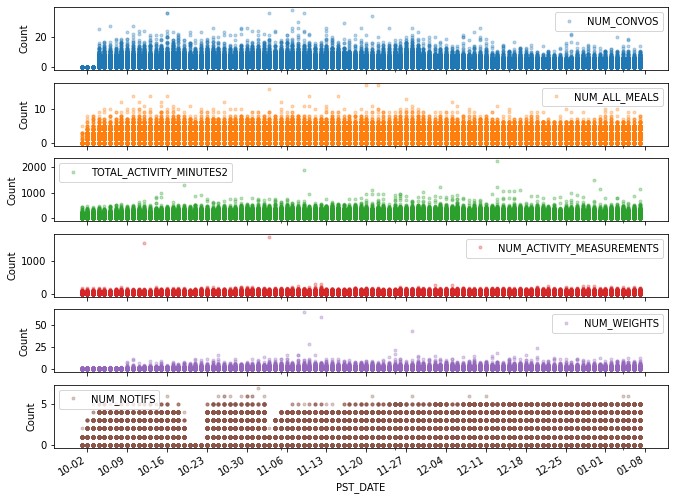

In [248]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

cols_plot = ['NUM_CONVOS', 'NUM_ALL_MEALS','TOTAL_ACTIVITY_MINUTES2','NUM_ACTIVITY_MEASUREMENTS','NUM_WEIGHTS', 'NUM_NOTIFS']
axes = df1[cols_plot].plot(marker='.', alpha=0.3, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Count')
    date_form = DateFormatter("%m-%d")
    ax.xaxis.set_major_formatter(date_form)
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

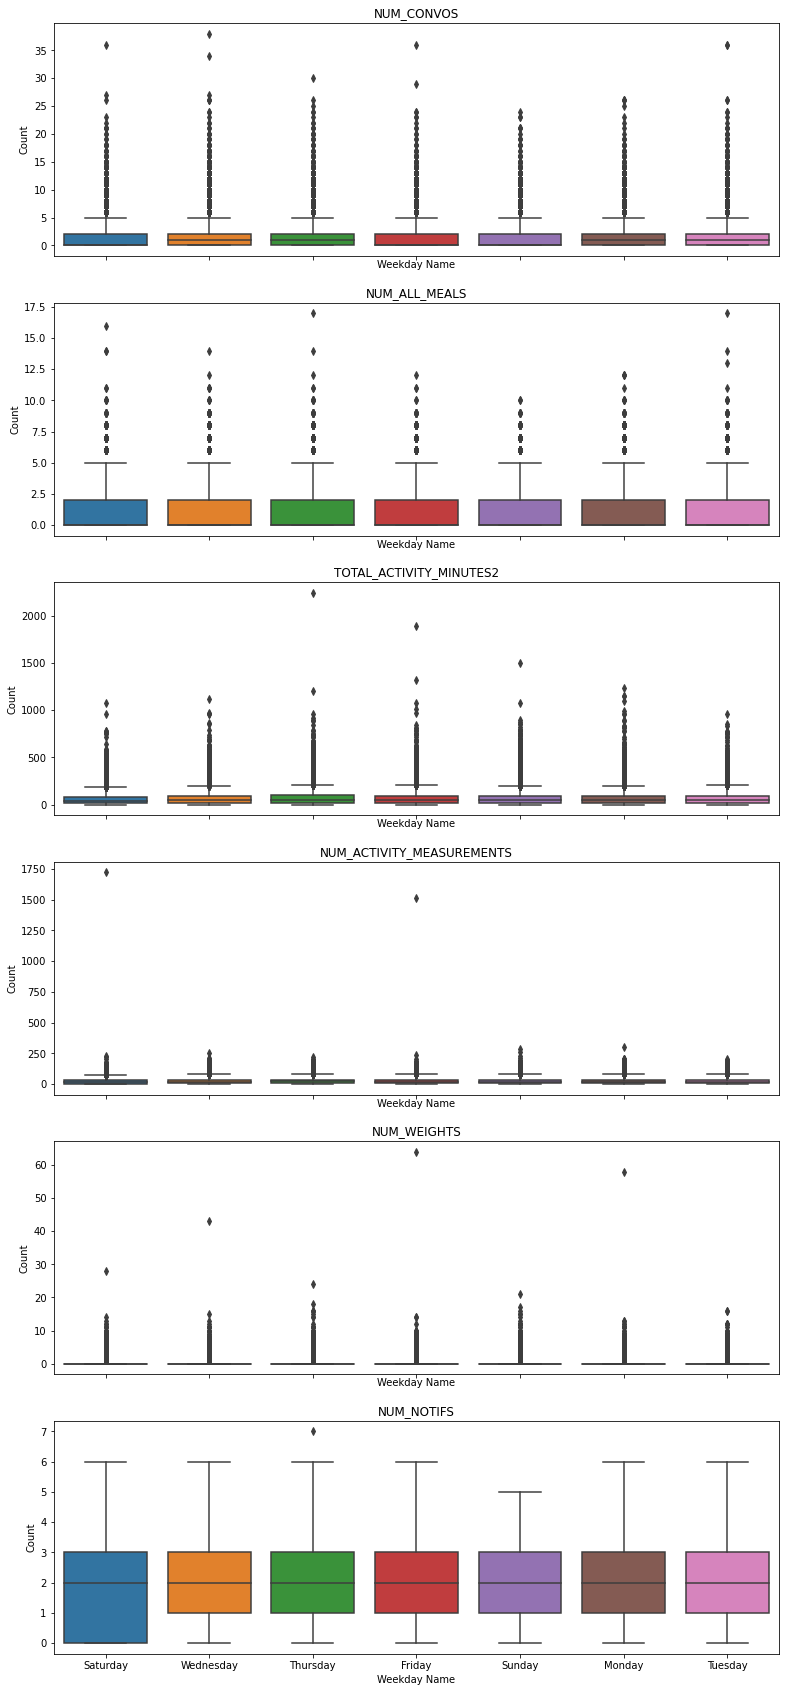

In [249]:
fig, axes = plt.subplots(6, 1, figsize=(13, 30), sharex=True)
for name, ax in zip(['NUM_CONVOS', 'NUM_ALL_MEALS','TOTAL_ACTIVITY_MINUTES2','NUM_ACTIVITY_MEASUREMENTS','NUM_WEIGHTS', 'NUM_NOTIFS'], axes):
    sns.boxplot(data=df1, x='Weekday Name', y=name, ax=ax)
    ax.set_ylabel('Count')
    ax.set_title(name)



The dataset is similar to the Panel data. Panel data are a type of longitudinal data, or data collected at different
points in time. It has two main components:
1. Time series data: Many observations on as few as one unit.
2. Pooled cross-sections: Two or more independent samples of many units drawn from the same population at different periods

We are interested in describing how user interactions change over time. We want to estimate causal models for this kind of analysis. 

One way to organize the panel data is to create a single record for each combination of user id and period. The most precise data format to use is a MultiIndex DataFrame. This is the most precise since only single columns can preserve all types within a panel. For example, it is not possible to span a single Categorical variable across multiple columns when using a pandas Panel. The data is in long format.

In [250]:
mi_data = data_agg.set_index(['USER_ID', 'PST_DATE'])
print(mi_data.head())

                    NUM_CONVOS  NUM_ALL_MEALS  TOTAL_ACTIVITY_MINUTES2  \
USER_ID PST_DATE                                                         
423344  2018-11-03         0.0              0                61.600000   
427412  2018-10-24         0.0              0                21.900000   
        2018-10-25         0.0              0                39.250000   
652251  2018-12-14         0.0              0               124.333336   
658572  2018-11-18         0.0              0               222.516660   

                    NUM_ACTIVITY_MEASUREMENTS  NUM_WEIGHTS  NUM_NOTIFS  
USER_ID PST_DATE                                                        
423344  2018-11-03                         40          0.0         0.0  
427412  2018-10-24                         25          0.0         0.0  
        2018-10-25                         26          0.0         0.0  
652251  2018-12-14                         56          0.0         3.0  
658572  2018-11-18                         

In [251]:
# checking for missing data and found out that there is no missing data
mi_data.shape==mi_data.dropna().shape


True

For using the panel data regression, we need to be sure that there is cross-section variation (user to user variation). For this, we slice the data for some users and see if their feature activities are changing or not. For this, we choose to use a lag plot and an ACF(autocorrelation) plot.
A lag plot helps to check if a time-series data set is random or not. A random data will be evenly spread whereas a shape or trend indicates the data is not random. It is a scatter plot where one data point is plotted against the other with a fixed amount of lag. So a first-order lag plot is using a lag of 1. 
A correlogram (also called Auto Correlation Function ACF Plot or Autocorrelation plot) is a visual way to show the serial correlation in data that changes over time (i.e. time series data). It describes how well the present value of the series is related to its past values

In [252]:
#Let's analyze user_id=427412  
def analyze_user(id):
    df=mi_data.loc[(id)]
    df['Year'] = df.index.year
    df['Month'] = df.index.month
    df['Weekday Name'] = df.index.day_name()
    pd.plotting.lag_plot(df['NUM_CONVOS'])
    import statsmodels.api as sm
    sm.graphics.tsa.plot_acf(df.NUM_CONVOS)
    df.boxplot(figsize=(15,6),by='Month',column='NUM_CONVOS')
    df.boxplot(figsize=(15,6),by='Weekday Name',column='NUM_CONVOS')
    
#pd.plotting.lag_plot(mi_data.loc[(427412)]['NUM_CONVOS'])


Let's analyze the data for two unique users. We make use of the list that earlier we created to find the unique user. For user 1, we can see that there is a nonlinear trend of the number of notification with time. Also, we can see from the ACF plot that, there is some serial autocorrelation that exists for this user's number of notifications. The user might be started the app in the month of November and then after this month the interaction drops. The user interacted mostly on Sunday and Monday.

C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

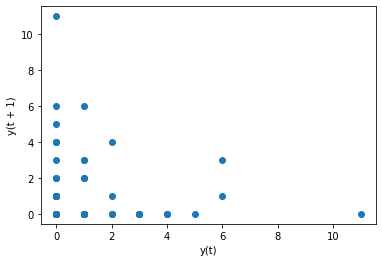

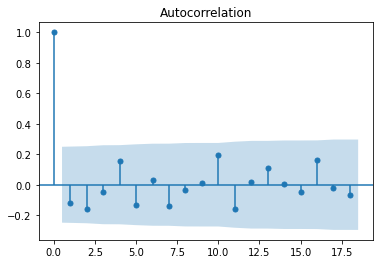

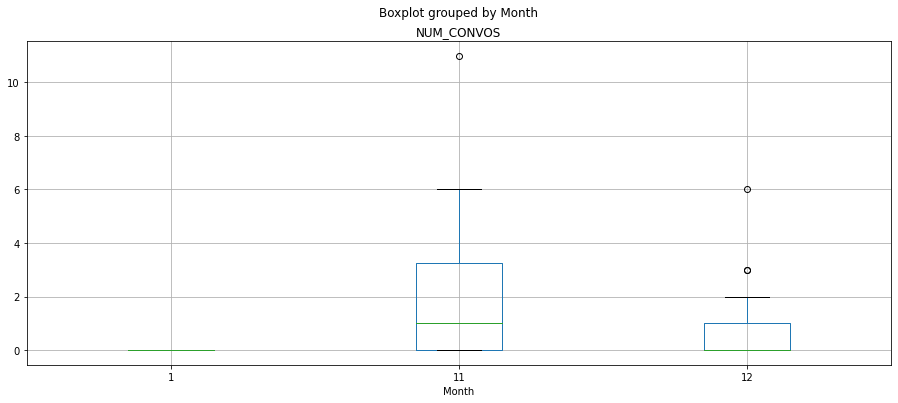

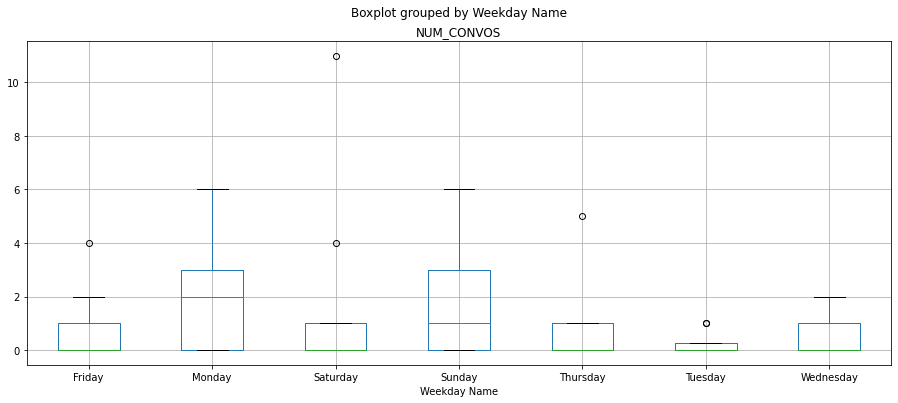

In [253]:
analyze_user(unique_user[33])

For user 2, we can see that there is still a different nonlinear trend in the lag plot also there is a different type of autocorrelation in ACF. The user might be started the app in the month of November and then after this month the interaction drops. The user interacted mostly on Monday, Tuesday, and Thursday. If we plot other users, we can see that there are some variations across the users.

C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

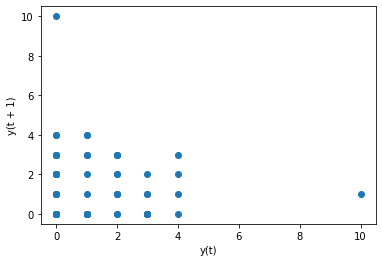

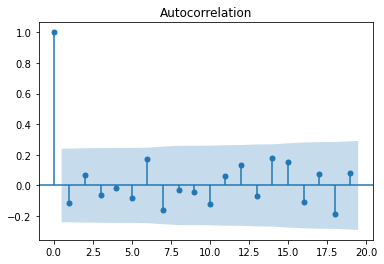

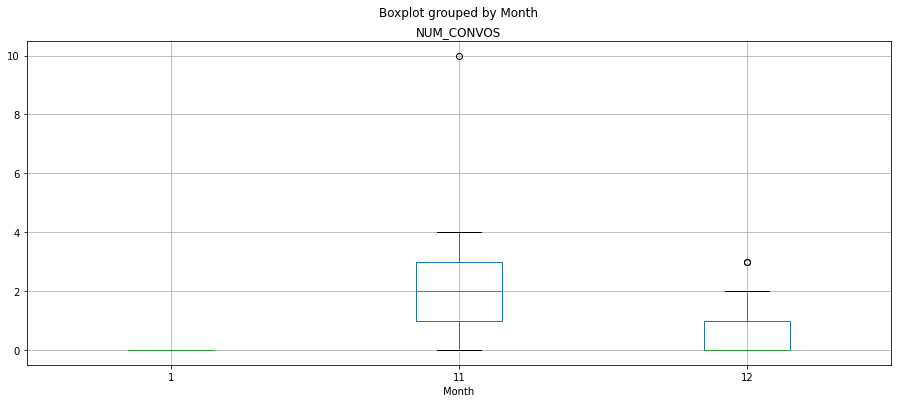

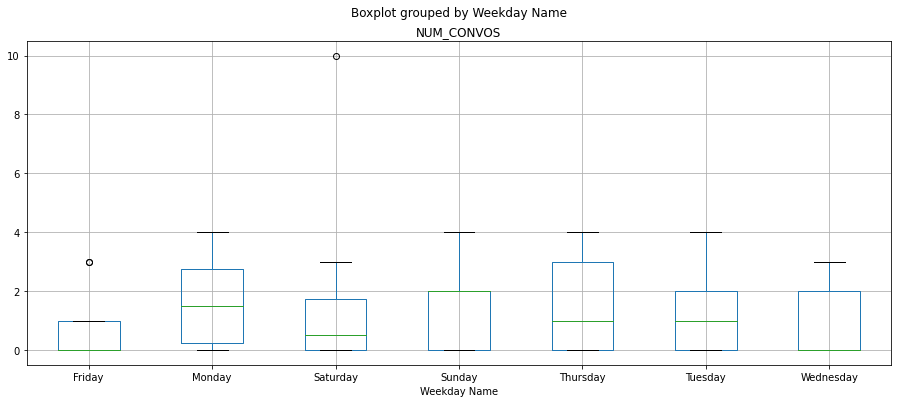

In [254]:
analyze_user(unique_user[13])


So we can see a decreasing nonlinear trend concerning time. There may be some outliers as such also detected in this data set. Lag can also be useful to identify a suitable time series model for the data. So looking at this nonlinear trend for our data a Mixed effect model will be good.

Now we will try to understand the relationship between the number of conversations with different types of covariates/features. Since this is the most accurate estimate of how many times a user interacts with the app, we will try a model to predict this feature. Let's take independent variables as the total activity, number of activity measurements, number of weights, and number of notifications whereas the number of conversations is the dependent variable.
First of all, I want to fit OLS (Ordinary Least Square) for the number of the conversation by taking other predictors. I want to use a model that can use both the time series and the cross-sectional component of the data. Starting with a simple and familiar one: Pooled OLS which is a least square regression for the panel data. The assumption of the model is similar to the OLS one. The regressor should be uncorrelated to the error term. The error term is mostly correlated over time for given residuals.  
So pooled OLS model is:
$$y_{it}=\alpha + \sum_k^K\beta_{k} X_{kit}+\epsilon_{it},$$
where $i$ represents the user id and $t$ represent the time and $k$ is the index of the covariates such as: number of meals, number of weights, etc. $\alpha$ and $\beta$'s are the coeeffcients of the model. 

In [255]:
from linearmodels.panel import PooledOLS
import statsmodels.api as sm
exog_vars = ['NUM_ALL_MEALS','TOTAL_ACTIVITY_MINUTES2','NUM_ACTIVITY_MEASUREMENTS','NUM_WEIGHTS', 'NUM_NOTIFS']
exog = sm.add_constant(mi_data[exog_vars])
mod = PooledOLS(mi_data.NUM_CONVOS, exog)
pooled_res = mod.fit()
print(pooled_res)

C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\linearmodels\panel\data.py:98: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_categorical(s):


                          PooledOLS Estimation Summary                          
Dep. Variable:             NUM_CONVOS   R-squared:                        0.4524
Estimator:                  PooledOLS   R-squared (Between):              0.6080
No. Observations:              468040   R-squared (Within):               0.4100
Date:                Thu, Dec 17 2020   R-squared (Overall):              0.4524
Time:                        11:28:24   Log-likelihood                -8.229e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                   7.732e+04
Entities:                        6671   P-value                           0.0000
Avg Obs:                       70.160   Distribution:                F(5,468034)
Min Obs:                       3.0000                                           
Max Obs:                       99.000   F-statistic (robust):          7.732e+04
                            

From the parameter estimation table, we can see that all the covariates are significant (p-value<0.05) in estimating the number of conversations. From the R-square(signifies model strength) value of 45.24%, we can also say it's not too bad in fitting the data. but it ignores the panel data and we did not take care of the fact that the error terms are correlated. So, we are losing out lots of information in this type of particular model.

The second type of model is Between Estimation. It calculates the average of the dependent and independent variables over time and does the OLS regression of the dependent variable on the independent. It uses cross-sectional information and ignores the time variation in the data. This model is consistent if the average of the regressors is independent overtime of the error term.
So Between Estimation model is:
$$\bar{y}_{i}=\alpha_i + \sum_k^K\beta_{ik} \bar{X}_{ik}+\bar{\epsilon}_i,$$
 where the bar superscript represents the average over time. 

In [194]:
from linearmodels.panel import BetweenOLS
mod = BetweenOLS(mi_data.NUM_CONVOS, exog)
be_res = mod.fit()
print(be_res)

                         BetweenOLS Estimation Summary                          
Dep. Variable:             NUM_CONVOS   R-squared:                        0.6170
Estimator:                 BetweenOLS   R-squared (Between):              0.6170
No. Observations:                6671   R-squared (Within):               0.4037
Date:                Wed, Dec 16 2020   R-squared (Overall):              0.4484
Time:                        16:07:01   Log-likelihood                   -5497.2
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      2147.5
Entities:                        6671   P-value                           0.0000
Avg Obs:                       70.160   Distribution:                  F(5,6665)
Min Obs:                       3.0000                                           
Max Obs:                       99.000   F-statistic (robust):             2147.5
                            

The R_squred is gone up now compared to the pooled OLS nut the overall R_squred has fallen a bit. The importance of the covariates on the dependent variable is similar to the pooled OLS model. Since, in this model we are just averaging out the data over time, it improves the estimation compared to the Pooled OLS one where both cross-sectional and time variation information are ignored. From the Parameter Estimations, we can see that all the covariates are changing over time and that's why all of them are important (p-values<0.05). Still, it may not be the right model for our dataset comparing the fact that
we did not consider the time variation of the data yet.

Now, let's consider the Frist Difference(FD) Estimation model. The first Difference is sometimes called a first-difference fixed effects(FE) model. If T=2, (two-period model) the FE and FD are identical. This model exploits the panel data.  When using first differences, time-invariant variables must be excluded and as from visualization, we saw that all the covariates are changing over time.
Thus, we can included all the covariates for this model. This model finds the individual specific changes in the regression and
the individual specific changes in the dependent variable. The model is:
$$y_{it}= \sum_k^K\beta_{ik} X_{ikt}+\epsilon_{it}+U_{i},$$
$$y_{i(t-1)}= \sum_k^K\beta_{ik} X_{ik(t-1)}+\epsilon_{i(t-1)}+U_i,$$
$$y_{it}-y_{i(t-1)}=\sum_k^K\beta_{ik} (X_{ikt}- X_{ik(t-1)})+\epsilon_{it}-\epsilon_{i(t-1)} $$
where $U_i$ represent the unobsered variables that is related to individual specific. Thus it lags the individual specific variables by one period and takes difference between the two equations. Thus, individual heterogeneity is eliminated from the model.



In [256]:
from linearmodels.panel import FirstDifferenceOLS
mod = FirstDifferenceOLS(mi_data.NUM_CONVOS, mi_data[exog_vars])
fd_res = mod.fit()
print(fd_res)

C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\linearmodels\panel\data.py:98: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_categorical(s):
C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\linearmodels\panel\data.py:98: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_categorical(s):


                     FirstDifferenceOLS Estimation Summary                      
Dep. Variable:             NUM_CONVOS   R-squared:                        0.3991
Estimator:         FirstDifferenceOLS   R-squared (Between):              0.7664
No. Observations:              379366   R-squared (Within):               0.4109
Date:                Thu, Dec 17 2020   R-squared (Overall):              0.5786
Time:                        11:29:02   Log-likelihood                -7.558e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                   5.039e+04
Entities:                        6671   P-value                           0.0000
Avg Obs:                       70.160   Distribution:                F(5,379361)
Min Obs:                       3.0000                                           
Max Obs:                       99.000   F-statistic (robust):          5.039e+04
                            

The R-square value of this model is lowered compared to the other two models but overall R-square has improved. It takes into consideration all the covariates.

Now we will consider one type of model that is specifically built for panel data. It's called fixed effect. 
It treats the unobserved individual heterogeneity ($U_i$) for each user to be correlated with explanatory variables. Like, first-order difference, it tries to eliminate the effect of $U_i$ by transformation prior to estimation. 
The architecture of the model is:
$$y_{it}=\alpha_i+\gamma_i+ \sum_k^K\beta_{ik} X_{ikt}+\epsilon_{it}+U_i,$$
$$\bar{y}_{i}=\alpha_i+\gamma_i+ \sum_k^K\beta_{ik} \bar{X}_{ik}+\bar{\epsilon}_i+\bar{U}_i,$$
$$y_{it}-\bar{y}_{i}=\sum_k^K\beta_{ik} (X_{ikt}-\bar{X}_{ik})+\epsilon_{it}-\bar{\epsilon}_i $$
Since,$U_i-\bar{U}_i=0$
Difference has lead to the elimination of the individual specific variable $U_i$. This is also called time demeaned mode. Here error term will not be correlated over time. Here, $\alpha_i$ and $\gamma_i$ are the user specific and time effects. \
One-way fixed effects error components model - only the user effects or the time effect are conditioned out. Two-way fixed effects error components model – both the user effects and time effects are conditioned out.

In [196]:
#considering $𝛼_𝑖$
from linearmodels.panel import PanelOLS
mod = PanelOLS(mi_data.NUM_CONVOS, exog, entity_effects=True)
fe_res = mod.fit()
print(fe_res)



                          PanelOLS Estimation Summary                           
Dep. Variable:             NUM_CONVOS   R-squared:                        0.4116
Estimator:                   PanelOLS   R-squared (Between):              0.5877
No. Observations:              468040   R-squared (Within):               0.4116
Date:                Wed, Dec 16 2020   R-squared (Overall):              0.4496
Time:                        16:07:20   Log-likelihood                -7.868e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                   6.455e+04
Entities:                        6671   P-value                           0.0000
Avg Obs:                       70.160   Distribution:                F(5,461364)
Min Obs:                       3.0000                                           
Max Obs:                       99.000   F-statistic (robust):          6.455e+04
                            

In [197]:
#considering $𝛾_𝑖$
from linearmodels.panel import PanelOLS
mod = PanelOLS(mi_data.NUM_CONVOS, exog, time_effects=True)
fe_res_time = mod.fit()
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:             NUM_CONVOS   R-squared:                        0.4116
Estimator:                   PanelOLS   R-squared (Between):              0.5877
No. Observations:              468040   R-squared (Within):               0.4116
Date:                Wed, Dec 16 2020   R-squared (Overall):              0.4496
Time:                        16:07:20   Log-likelihood                -7.868e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                   6.455e+04
Entities:                        6671   P-value                           0.0000
Avg Obs:                       70.160   Distribution:                F(5,461364)
Min Obs:                       3.0000                                           
Max Obs:                       99.000   F-statistic (robust):          6.455e+04
                            

In [198]:
from linearmodels.panel import PanelOLS
mod = PanelOLS(mi_data.NUM_CONVOS, exog, entity_effects=True,time_effects=True)
fe_res_both = mod.fit()
print(fe_res_both)


                          PanelOLS Estimation Summary                           
Dep. Variable:             NUM_CONVOS   R-squared:                        0.3691
Estimator:                   PanelOLS   R-squared (Between):              0.5919
No. Observations:              468040   R-squared (Within):               0.4028
Date:                Wed, Dec 16 2020   R-squared (Overall):              0.4444
Time:                        16:07:42   Log-likelihood                -7.749e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                   5.398e+04
Entities:                        6671   P-value                           0.0000
Avg Obs:                       70.160   Distribution:                F(5,461266)
Min Obs:                       3.0000                                           
Max Obs:                       99.000   F-statistic (robust):          5.398e+04
                            

The FE model is not a good fit for this dataset even though we tried one-way and both-away FE models by comparing the overall R-square.


Random Effect model:
Fixed effects methods are inefficient. They throw away information. Pooled OLS is inefficient because it does not exploit the autocorrelation
in the composite error term. It assumes that individual-specific effects are independent of the regressors. The individual-specific effect is included in the error term. The random-effects model is virtually identical to the pooled OLS model except that it accounts for the structure of the model and so is more efficient. Random effects use a quasi-demeaning strategy which subtracts the time average of the within entity values to account for the common shock.  

In the fixed-effects model, we have controlled for differences between individual counties. But what about variables that are constant across individuals but change over time? A random-effects model takes into consideration these individual variations as well as time-dependent variations. The model eliminates biases from variables that are unobserved and change over time.

In [199]:
from linearmodels.panel import RandomEffects
mod = RandomEffects(mi_data.NUM_CONVOS, exog)
re_res = mod.fit(cov_type='robust')
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:             NUM_CONVOS   R-squared:                        0.4169
Estimator:              RandomEffects   R-squared (Between):              0.5943
No. Observations:              468040   R-squared (Within):               0.4116
Date:                Wed, Dec 16 2020   R-squared (Overall):              0.4501
Time:                        16:07:45   Log-likelihood                -7.902e+05
Cov. Estimator:                Robust                                           
                                        F-statistic:                   6.694e+04
Entities:                        6671   P-value                           0.0000
Avg Obs:                       70.160   Distribution:                F(5,468034)
Min Obs:                       3.0000                                           
Max Obs:                       99.000   F-statistic (robust):          2.487e+04
                            

The RE model is also not a good fit for this dataset by comparing the R-square values with the other models

Now, let's compare all the models side by side. In terms of R-square, the between estimations model is preferable but as we are more concerned with the overall R-square, the Fixed Difference estimation model is more preferable compared to other models. Now, if we consider the FD model, the relationship of the number of conversation have positive correlations with all features except the number of notifications. Thus, we can conclude that users don't prefer to have many notifications. This may create a bad image of the app in their eyes. Also, the number of meals and weights have a bigger impact on the notifications. It seems when they finished these activities and entered these features values, they were more concerned about their health and interact more with the app.

In [200]:
from linearmodels.panel import compare
print(compare({"FE":fe_res,"FixedDifference":fd_res,"BE":be_res,"RE":re_res,"Pooled":pooled_res}))

                                                  Model Comparison                                                 
                                          FE        FixedDifference             BE                RE         Pooled
-------------------------------------------------------------------------------------------------------------------
Dep. Variable                     NUM_CONVOS             NUM_CONVOS     NUM_CONVOS        NUM_CONVOS     NUM_CONVOS
Estimator                           PanelOLS     FirstDifferenceOLS     BetweenOLS     RandomEffects      PooledOLS
No. Observations                      468040                 379366           6671            468040         468040
Cov. Est.                         Unadjusted             Unadjusted     Unadjusted            Robust     Unadjusted
R-squared                             0.4116                 0.3991         0.6170            0.4169         0.4524
R-Squared (Within)                    0.4116                 0.4109     

From the covariance matrix of the FD model, we can see how the relationship between different features is. We can see that number of meals is negatively related to the number of activities, the number of weights, and activity measurements.
The number of activity measurements and the number of meals are positively correlated with the number of notifications. These relations make sense if we think plainly.

In [201]:
fe_res.cov

,const,NUM_ALL_MEALS,TOTAL_ACTIVITY_MINUTES2,NUM_ACTIVITY_MEASUREMENTS,NUM_WEIGHTS,NUM_NOTIFS
const,3.071530e-05,-2.159959e-06,-2.918100e-08,-4.179100e-07,-9.130356e-07,-6.581335e-06
NUM_ALL_MEALS,-2.159959e-06,2.657648e-06,-6.529880e-09,-1.778784e-08,-4.886097e-07,1.760420e-07
TOTAL_ACTIVITY_MINUTES2,-2.918100e-08,-6.529880e-09,1.682001e-09,-3.138670e-09,-1.375149e-09,-4.207526e-10
NUM_ACTIVITY_MEASUREMENTS,-4.179100e-07,-1.778784e-08,-3.138670e-09,2.656136e-08,-9.642890e-09,1.915813e-08
NUM_WEIGHTS,-9.130356e-07,-4.886097e-07,-1.375149e-09,-9.642890e-09,1.052862e-05,-2.206684e-07
NUM_NOTIFS,-6.581335e-06,1.760420e-07,-4.207526e-10,1.915813e-08,-2.206684e-07,2.983708e-06


We can also get a prediction from this FD model. Below is the true value of the number of conversations and predicted values of it from the FD model.

In [257]:
pred_values=fe_res.predict(exog)['predictions'].values
True_values=mi_data['NUM_CONVOS'].values
d={'True_value':True_values,'pred_values':pred_values}
pp=pd.DataFrame(d)
pp

,True_value,pred_values
0,0.0,0.544231
1,0.0,0.486245
2,0.0,0.501217
3,0.0,0.361094
4,0.0,0.682582
...,...,...
468035,0.0,0.110977
468036,0.0,0.103473
468037,4.0,2.831917
468038,0.0,0.500252


<h1>Conclusion</h1>
<p>
By analyzing the two datasets, I have a few major takeaways. Most of the users finished their missions, while 15% of the user did not complete their mission. Among this 15%, around 30% are first-timers which means they started but did not finish a single complete mission.  Mostly a single mission was completed by users and it took around 7 days mostly to complete a mission. Now in terms of agg_info dataset, this data represents a panel or longitudinal data where for each user there are multiple entries at multiple periods. After creating a proper format, we can see that most of the conversations are from the last three months of 2018. The features in the data do not vary much on a monthly, but on a weekday basis, we can see a pattern. For example, from Friday through Sunday, users were not interacting much with the app although the data are showing that they did input workouts more on these days. We then see that, from user to user, their features activities are varying over time. To understand the relationship between the features, we can build a predictive model. For the panel data with time series and user-specific variation, we considered pooled ordinary least square regression and some fixed and random effects models. By considering how much variability is explained by the models, we chose the Fixed Difference model (one kind of fixed effect model). From this fitted model covariance and coeeficients, we also got some ideas regarding the relationship between features. For example, the number of notifications is slightly in negative relation with the number of conversations. And lastly, we also see how we can predict from this model for future observations.
</p>